## Imports

In [3]:
import numpy as np
import scipy.signal as signal
import cmath
import matplotlib.pyplot as plt

## Definisjoner av variabler

d : avstanden mellom to komponenter/mikrofoner = $x_{ij}$ $\newline$
c : lydhastighet $\newline$
lag : forsinkelse i samples med notasjon "n", dog ofte omtalt i literatur som l, men ikke her $\newline$
$\ \ \quad$ Kan også regnes ut som $\tau_{12}*{f_s}$ $\newline$
$\Delta t$ : tidsforsinkelse = $\frac{lag}{f_s}$ $\newline$
$\tau_{12}$ : tidsforsinkelsen mellom mikrofon 1 og 2 = $\frac{-l}{c}$ da l er negativ retning på x-akse $\newline$
$\ \ \quad$ Kan også regnes ut som $\frac{\text{delay in samples}}{f_s}$ $\newline$
$\alpha$ : vinkelen mellom sensor i og j $\newline$
$\theta$ : innfallsvinkel i forhold til x-aksen $\newline$
l : komponenten av d langs x-aksen = $d*cos(\alpha)$ $\newline$
$\mathbf{x}$ : vektoren til lydbølgen som treffer mikrofonene = $[rcos(\theta), rsin(\theta)]$, r = 1 initiellt. Ikke forvekle med $x_{ij}$ $\newline$

\begin{align}
\theta_0 = \arctan{\biggl( \sqrt{3}\frac{n_{31}+n_{21}}{n_{31} − n_{21} + 2n_{32}} \biggl)} \\
\theta = \left\{
    \begin {aligned}
         & \theta_0, \hspace{9mm} −n21 + n31 + 2n32 > 0 \\
         & \theta_0 + \pi, \hspace{3mm} −n21 + n31 + 2n32 < 0\\
    \end{aligned}
\right.
\end{align}

\begin{align}
    0 \leq n_{ij} \leq n_{max} \hspace{3mm} \epsilon [0, 1, 2, ... , n_{max}-1 , n_{max}]
\end{align}

## Forberedelsesoppgave
#### 2.1
For to lydsignaler, x og y, vil krysskorrelasjonen mellom dem kunne presenteres som en sum av alle komponenter

\begin{align}
r_{xy}[l] = \sum_{n = 0}^{\infty} x[n]y[n + l]
\end{align}

Ved å liste opp krysskorrelasjonen med alle ulike lag, l, kan vi finne vedrien $l_0$ som gir høyest verdi:

\begin{align}
\mathbf{r} = [r_{xy}[l_{min}], ... , r_{xy}[0], r_{xy}[1], ... , r_{xy}[l_{max}],] \\
l_i = argmax(\mathbf{r})
\end{align}




In [ ]:
signal1, signal2, fs = np.random.randn(1000), np.random.randn(1000), 1000
correlation = signal.correlate(signal1, signal2, mode='full')
lags = signal.correlation_lags(len(signal1), len(signal2), mode='full')
lag = lags[np.argmax(correlation)]
#print(lags[980:1020])
#print(correlation)

[-19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2
  -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20]
[ 0.63517948  2.81101949  4.80226768 ...  1.94626453 -0.28302008
  0.18922922]


In [5]:
#Eksempel
import numpy as np
from scipy.signal import correlate, correlation_lags

# To eksempelsignaler
x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 4, 3, 2, 1])

# Beregn korrelasjonen
correlation = correlate(x, y, mode='full')

# Generer tilsvarende lags
lags = correlation_lags(len(x), len(y), mode='full')

# Finn indeksen med maksimal korrelasjon
max_corr_index = np.argmax(correlation)

# Finn tilsvarende lag
lag_at_max_corr = lags[max_corr_index]

print(f"Indeks med maksimal korrelasjon: {max_corr_index}")
print(f"Tilsvarende lag: {lag_at_max_corr}")
print(correlation)
print(lags)

Indeks med maksimal korrelasjon: 6
Tilsvarende lag: 2
[ 1  4 10 20 35 44 46 40 25]
[-4 -3 -2 -1  0  1  2  3  4]


#### 2.2
a)

Maksimal sampler med forsinkelse er $n_{max} = \tau f_s = \frac{d}{c} f_s$
Gitt at $f_s = 31250$ og $d = 5.5 cm \Rightarrow n_{max} = 5.0109\text{ samples} \sim 5\text{ samples}$ 
$%Spørsmål: f_s til mikrofon eller adc?$


b)
Hvis vi har to mikrofoner, så er antall unike innfallsvinkler vi kan detektere avhengig av hvor mange forskjellige forsinkelser vi kan måle.
Når maksimal forsinkelse økes fra 2 til 4 sampler, får vi dobbelt så høy tidsoppløsning for vinkelmålingen.
Derfor kan vi konkludere med at en maksimal forsinkelse på 4 sampel gir flere unike innfallsvinkler enn en maksimal forsinkelse på 2 sampel.

## LAB

### Korrelasjon

In [56]:
def cross_correlation(signal1, signal2):
    corr = signal.correlate(signal1 - np.mean(signal1), signal2 - np.mean(signal2), mode='full')
    lags = signal.correlation_lags(len(signal1), len(signal2), mode='full')

    delay = lags[np.argmax(corr)]  # Find peak lag (delay in discrete samples)
    return corr, lags, delay

def auto_correlation(signal):
    return cross_correlation(signal, signal)


### Forsikelser

In [7]:
def compute_tdoa(mic1, mic2, mic3, fs):
    corr_21, lags_21, delay_21 = cross_correlation(mic2, mic1)
    corr_31, lags_31, delay_31 = cross_correlation(mic3, mic1)
    corr_32, lags_32, delay_32 = cross_correlation(mic3, mic2)
    
    #n21, n31, n32 = delay_21, delay_31, delay_32 # sample delays
    #t21, t31, t32 = n21 / fs, n31 / fs, n32 / fs
    #t21, t31, t32 = l21/c, l31/c, l32/c # time delays
    t21, t31, t32 = delay_21 / fs, delay_31 / fs, delay_32 / fs  # time delays (tau)
    n21, n31, n32 = int(t21 * fs), int(t31 * fs), int(t32 * fs)  # sample delays (lag)
    
    
    return (corr_21, lags_21, delay_21), (corr_31, lags_31, delay_31), (corr_32, lags_32, delay_32), (t21, t31, t32), (n21, n31, n32)

In [8]:
# IGNORE
# #def delays(l, c : int = 343, fs : int = 16000):
    #delta_t = l/fs
    #tau_ij = -l/c # time delay
    #n = int(tau_ij * fs) # sample delay
    #return delta_t, tau_ij, n

### Vinkel estimering og utregning

In [93]:
def estimate_angle(n21, n31, n32, d, c=343):
    theta = -np.arctan((np.sqrt(3) * (n31 + n21)) / (n31 - n21 + 2 * n32))
    if (n31 - n21 + 2 * n32) < 0:
        theta += np.pi
    #if (n31 - n21 + 2 * n32) == 0:
     #   theta = np.pi / 2
    return np.degrees(theta)  # Convert to degrees


### Test

In [11]:
# IGNORE
# import numpy as np
from scipy.signal import correlate
from scipy.io import wavfile

# Les inn lydfiler
fs, signal1 = wavfile.read('signal1.wav')
_, signal2 = wavfile.read('signal2.wav')

# Funksjon for å finne forsinkelsen ved hjelp av krysskorrelasjon
def find_delay(signal1, signal2, fs):
    # Beregn krysskorrelasjonen mellom de to signalene
    correlation = correlate(signal1, signal2, mode='full')
    lag = np.argmax(correlation) - (len(signal2) - 1)
    # Konverter forsinkelsen fra antall prøver til tid i sekunder
    delay_in_seconds = lag / fs
    return delay_in_seconds

# Bruk funksjonen
delay = find_delay(signal1, signal2, fs)
print(f'Effektiv forsinkelse mellom signalene er: {delay} sekunder')

import numpy as np
from scipy import signal

# Eksempeldata: erstatt disse med dine faktiske lydsignaler
# signal1 = ...
# signal2 = ...
# fs = samplingsfrekvensen

# Beregn krysskorrelasjon
correlation = signal.correlate(signal1, signal2, mode='full')

# Beregn tilsvarende tidsforskyvninger
lags = signal.correlation_lags(len(signal1), len(signal2), mode='full')

# Finn laget med maksimal korrelasjon
lag = lags[np.argmax(correlation)]

# Beregn tidsforsinkelsen i sekunder
time_delay = lag / fs

print(f"Den estimerte tidsforsinkelsen mellom signalene er {time_delay} sekunder.")


FileNotFoundError: [Errno 2] No such file or directory: 'signal1.wav'

In [94]:
sample_period, data = np.load("adc_data_sindre_30cm_180deg.npz").values()
print(sample_period, data)
mic1 = data[2][2000:]
mic2 = data[0][2000:]
mic3 = data[1][2000:]
fs = int(1 / sample_period)
print(fs)

3.2e-05 [[-0.09844434 -0.10408399 -0.10972364 ... -0.0074043  -0.00659864
  -0.00498731]
 [-0.09273636 -0.0806514  -0.07501175 ... -0.01539261 -0.01297561
  -0.01136429]
 [ 0.00361703  0.00039438 -0.00524527 ... -0.00121695 -0.00282828
  -0.00282828]
 [-0.02370867 -0.02370867 -0.02370867 ...  0.02785383  0.02704816
   0.02946515]
 [-0.03086103 -0.03086103 -0.03086103 ...  0.03842608  0.03520342
   0.04003741]]
31250


In [95]:
#fs = 31250  # Sampling frequency in Hz
d = 0.055  # Distance between microphones in meters
c = 343  # Speed of sound in m/s

# Simulating three signals with different delays
# Simulated test data (replace with real data from microphone recordings)
time = np.linspace(0, 1, len(mic1), endpoint=False)
signal_original = np.sinc(2 * np.pi * 1000 * time)  # 1kHz sine wave
#mic1 = signal_original
#mic2 = np.roll(signal_original, 1)  # Simulating a delay
#mic3 = np.roll(signal_original, -1)  # Simulating a greater delay
                                    # Note that the delays 3 and 4 are the ones printed below. 
                                    # When using real data, these will be the delays between the microphones
                                    # , and not be greater than the maximum theoretical delay.

# Compute cross-correlation and TDOA
tdoa_results = compute_tdoa(mic1, mic2, mic3, fs)
(n21, n31, n32) = tdoa_results[4]
n_max = fs*d/c # Maximum theoretical delay in samples

theta_estimated = estimate_angle(n21, n31, n32, d, c)
print(f"Estimated Angle: {theta_estimated:.2f} degrees")
print(f'Sample delays: n21 = {n21}, n31 = {n31}, n32 = {n32}, n_max = {n_max:.2f}')


Estimated Angle: 8.95 degrees
Sample delays: n21 = -2, n31 = 1, n32 = 4, n_max = 5.01


### Plotting

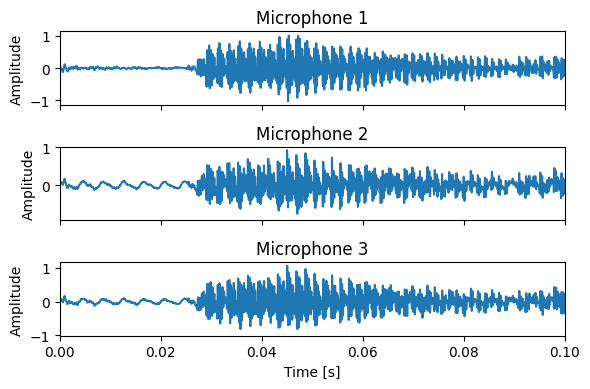

In [96]:
# Plotting the signals
fig, axs = plt.subplots(3, 1, figsize=(6, 4), sharex=True)
labels = ['Microphone 1', 'Microphone 2', 'Microphone 3']
for i, mic in enumerate([mic1, mic2, mic3]):
    axs[i].plot(time, mic)
    axs[i].set_ylabel('Amplitude')
    axs[i].set_title(labels[i])
    axs[i].set_xlim([0, 0.1])
axs[-1].set_xlabel('Time [s]')
plt.tight_layout()
plt.show()

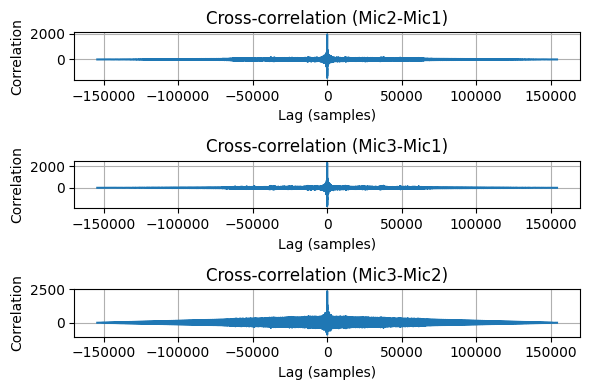

In [97]:
# Plot cross-correlation results against lags
fig, axs = plt.subplots(3, 1, figsize=(6, 4))
labels = ['Cross-correlation (Mic2-Mic1)', 'Cross-correlation (Mic3-Mic1)', 'Cross-correlation (Mic3-Mic2)']
for i, (corr, lags, _) in enumerate(tdoa_results[:3]):
    axs[i].plot(lags, corr)
    axs[i].set_title(labels[i])
    axs[i].set_xlabel('Lag (samples)')
    axs[i].set_ylabel('Correlation')
    
    #axs[i].set_xlim(200, 240)
    #axs[i].set_xticks(np.arange(-10, 11, 1))
    axs[i].grid()
plt.tight_layout()
plt.show()


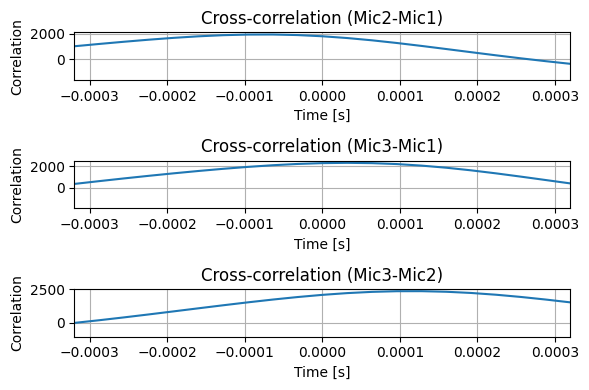

In [98]:
#Plot cross-correlation results agains time
fig, axs = plt.subplots(3, 1, figsize=(6, 4))
labels = ['Cross-correlation (Mic2-Mic1)', 'Cross-correlation (Mic3-Mic1)', 'Cross-correlation (Mic3-Mic2)']
for i, (corr, lags, _) in enumerate(tdoa_results[:3]):
    axs[i].plot(lags/fs, corr)
    axs[i].set_title(labels[i])
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel('Correlation')
    axs[i].grid()
    axs[i].set_xlim(-10/fs, 10/fs)
    
plt.tight_layout()
plt.show()

C:\Users\LarsL\AppData\Local\Temp\ipykernel_28140\3057462617.py:2: RuntimeWarning: invalid value encountered in scalar divide
  theta = -np.arctan((np.sqrt(3) * (n31 + n21)) / (n31 - n21 + 2 * n32))


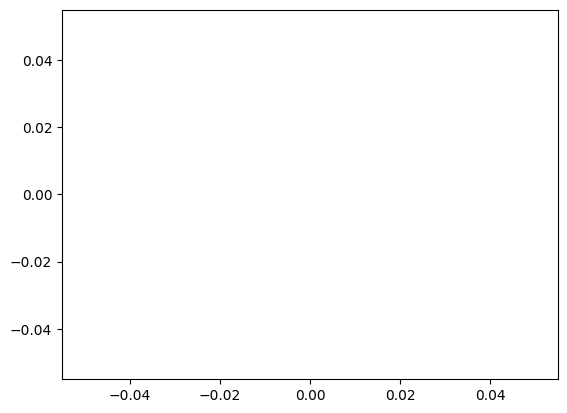

In [19]:
#Plot estimated angle vs actual angle, constant distance
angles = np.linspace(-90, 90, 1000)
x = np.arange(0, 5*np.pi, 0.1)
y = np.sin(x)
z = y * cmath.rect( 1., np.pi/3 )
w = y * cmath.rect( 1., -np.pi/3 )

for i, angle in enumerate(angles):
    #n21, n31, n32 = delays(d * np.cos(np.radians(angle)), c, fs)
    toda_result = compute_tdoa(y, z, w, fs)
    n21, n31, n32 = toda_result[4]
    theta_estimated = estimate_angle(n21, n31, n32, d, c)
    plt.plot(angle, theta_estimated, 'bo')



In [ ]:
#Plot estimated angle error vs actual angle, constant distance

In [ ]:
#Plot estimated angle vs distance to source, constant angle